In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [2]:
df = pd.read_csv(r"C:\Users\gopal\Documents\major2\old_powerconsumption_New_data.csv")
df

,Temperature,Humidity,Voltage,Current,Power
0,35.013286,1.620603,119.055519,3.030663,360.817191
1,25.908730,57.847918,48.723414,4.386690,213.734504
2,10.460330,64.609784,118.066455,2.184007,257.857940
3,19.179683,36.108564,28.903095,1.955580,56.522317
4,35.234379,14.920370,106.262071,2.360396,250.820597
...,...,...,...,...,...
6425,45.063457,11.782585,2.444523,9.460972,23.127565
6426,25.460191,56.616609,113.667354,4.692144,533.343581
6427,3.278908,22.049223,44.613427,7.462123,332.910886
6428,5.643323,18.213687,93.847874,3.571433,335.171347


In [3]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('Power',axis='columns'),df.Power)

LinearRegression()

In [4]:
reg.coef_

array([-5.15715443e-02,  2.55163223e-02,  4.94259464e+00,  5.86995557e+01])

In [7]:
reg.intercept_

-291.3545825222813

In [8]:
reg.predict([[35.0132,1.62060,119.055,3.030]])

array([473.18134291])

In [13]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state =0)
  
# fit the regressor with x and y data
regressor.fit(df.drop('Power',axis='columns'),df.Power)  

RandomForestRegressor(random_state=0)

In [17]:
regressor.predict([[35.0132,1.62060,119.055,3.030]])

array([359.03759047])

In [15]:
regressor.predict([[11.7479,27.8951,20.3125,3.0734]])

array([62.21107026])

In [75]:
regressor.predict([[33.7509,14.41909,113.7823,1.1863]])

array([134.52460574])

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(df, test_size=0.15)
print(f"Rows in train set: {len(X_train)}\nRow in test set: {len(X_test)}")

Rows in train set: 5465
Row in test set: 965


In [30]:
corr_matrix = df.corr()
corr_matrix['Power'].sort_values(ascending=False)

Power          1.000000
Voltage        0.650815
Current        0.643377
Temperature    0.005688
Humidity       0.001412
Name: Power, dtype: float64

<AxesSubplot:xlabel='Temperature', ylabel='Power'>

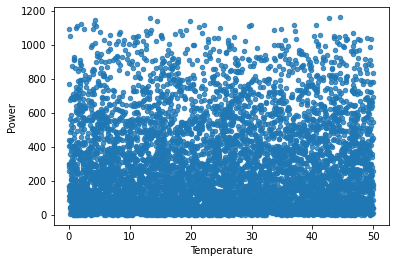

In [32]:
df.plot(kind="scatter",x = "Temperature",y = "Power",alpha=0.8)

<AxesSubplot:xlabel='Humidity', ylabel='Power'>

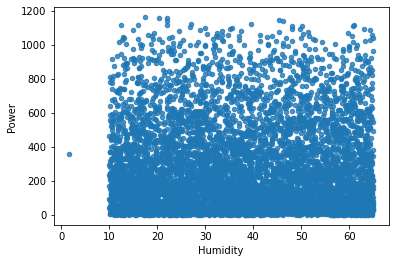

In [34]:
df.plot(kind="scatter",x = "Humidity",y = "Power",alpha=0.8)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6430 entries, 0 to 6429
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  6430 non-null   float64
 1   Humidity     6430 non-null   float64
 2   Voltage      6430 non-null   float64
 3   Current      6430 non-null   float64
 4   Power        6430 non-null   float64
dtypes: float64(5)
memory usage: 251.3 KB


In [44]:
data = X_train.drop("Power",axis=1)
Power = X_train["Power"].copy()

In [45]:
Power

2882      9.581611
2084    521.836087
1444     59.066646
1612    228.798305
4414    566.151300
           ...    
3401     37.933474
1403     93.404767
5661      0.045661
713      56.033366
163      89.561682
Name: Power, Length: 5465, dtype: float64

,Temperature,Humidity,Voltage,Current,Power
2882,27.337326,12.516090,1.946041,4.923643,9.581611
2084,6.271076,18.510050,102.726695,5.079849,521.836087
1444,6.492834,12.686130,38.639176,1.528673,59.066646
1612,44.266887,51.809101,23.329660,9.807186,228.798305
4414,25.036570,18.186136,70.555056,8.024248,566.151300


In [105]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor  
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state =0)
# regressor = DecisionTreeRegressor(random_state =0)
  
# fit the regressor with x and y data
regressor.fit(data,Power)  

RandomForestRegressor(random_state=0)

In [106]:
test_data = X_test.drop("Power",axis=1)
test_Power = X_test["Power"].copy()

In [107]:
from sklearn.metrics import mean_squared_error
power_predictions = regressor.predict(test_data)
mse = mean_squared_error(test_Power, power_predictions)
rmse = np.sqrt(mse)

In [108]:
rmse

4.007789769343997

In [109]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor,test_data,test_Power,scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([14.76280953, 14.29191063, 14.96594844, 11.18098951, 11.67897437,
       12.36604886, 15.50159224,  9.956574  , 11.65276951, 10.72301273])

In [110]:
def print_scores(scores):
    print("Score: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ",scores.std())

In [111]:
print_scores(rmse_scores)

Score:  [14.76280953 14.29191063 14.96594844 11.18098951 11.67897437 12.36604886
 15.50159224  9.956574   11.65276951 10.72301273]
Mean:  12.708062982099154
Standard Deviation:  1.8911668378029671


In [112]:
regressor.predict([[33.7509,14.41909,113.7823,1.1863]])

array([134.52460574])

In [113]:
def compute_accuracy(Y_true, Y_pred):  
    correctly_predicted = 0  
    # iterating over every label and checking it with the true sample  
    for true_label, predicted in zip(Y_true, Y_pred):  
        if round(true_label) == round(predicted) or round(true_label) == round(predicted)-1 or round(true_label)-1 == round(predicted):  
            correctly_predicted += 1  
    # computing the accuracy score  
    accuracy_score = correctly_predicted / len(Y_true)  
    return accuracy_score  

In [114]:
score = compute_accuracy(test_Power,power_predictions)
score

0.49222797927461137